In [1]:
# Import required libraries
import numpy as np          # For numerical operations
import pandas as pd        # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns      # For statistical data visualization
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn import metrics  # For model evaluation metrics

In [2]:
data = pd.read_csv('data.csv')
data.head()


,datetime,CellID,countrycode,internet,total_sms,total_calls
0,2013-11-03 00:00:00,1,0,0.2559,0.9559,0.4037
1,2013-11-03 00:00:00,1,39,54.5778,1.8197,0.8116
2,2013-11-03 00:00:00,2,0,0.2559,0.9561,0.4050
3,2013-11-03 00:00:00,2,39,54.7746,1.8261,0.8224
4,2013-11-03 00:00:00,3,0,0.2559,0.9563,0.4063


In [3]:
#Dropping rows with missing datetime if any

data = data.dropna(subset=['datetime'])

In [4]:
data.describe()

,CellID,countrycode,internet,total_sms,total_calls
count,1.828063e+06,1.828063e+06,1.828063e+06,1.828063e+06,1.828063e+06
mean,5.272951e+03,3.468055e+02,4.583044e+01,4.871952e+00,3.166601e+00
std,2.720244e+03,4.278563e+03,2.322693e+02,1.728291e+01,1.596032e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.134000e+03,3.300000e+01,2.559000e-01,1.382700e+00,4.600000e-01
50%,5.376000e+03,4.100000e+01,2.559000e-01,1.441000e+00,5.729000e-01
75%,7.491000e+03,8.600000e+01,2.559000e-01,1.441000e+00,5.729000e-01
max,1.000000e+04,9.725900e+04,2.375316e+04,1.041003e+03,1.420810e+03


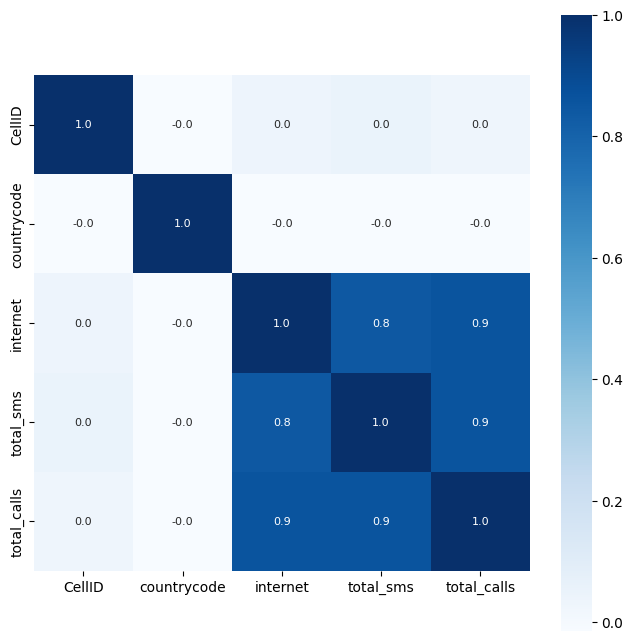

In [5]:
# Create correlation matrix, excluding datetime column
correlation = data.drop(columns=['datetime']).corr()

# Create a correlation heatmap
plt.figure(figsize=(8, 8))  # Set figure size to 8x8 inches
sns.heatmap(correlation, 
            cbar=True,      # Show colorbar
            square=True,    # Make cells square
            fmt='.1f',      # Format numbers to 1 decimal place
            annot=True,     # Show values in cells
            annot_kws={'size': 8},  # Set annotation text size
            cmap='Blues')   # Use Blues color palette
plt.show()

Assigning the Independent and Dependent Variables

In [6]:
# Prepare features (X) by dropping target variable and datetime
X = data.drop(['total_sms','datetime'], axis=1)  # axis=1 means drop columns
# Set target variable (Y) as total_sms
Y = data['total_sms']

# Display features and target variable
print(X)  # Show feature matrix
print(Y)  # Show target vector

         CellID  countrycode  internet  total_calls
0             1            0    0.2559       0.4037
1             1           39   54.5778       0.8116
2             2            0    0.2559       0.4050
3             2           39   54.7746       0.8224
4             3            0    0.2559       0.4063
...         ...          ...       ...          ...
1828058    9999          221    0.2559       0.9470
1828059   10000            0    0.2559       0.4363
1828060   10000           39   98.3272       2.6082
1828061   10000           49    0.2559       0.3551
1828062   10000          221    0.2559       0.8675

[1828063 rows x 4 columns]
0          0.9559
1          1.8197
2          0.9561
3          1.8261
4          0.9563
            ...  
1828058    1.4410
1828059    1.5536
1828060    7.4781
1828061    1.4410
1828062    1.4410
Name: total_sms, Length: 1828063, dtype: float64


Training The Model

In [7]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,                    # Features and target
    test_size=0.33,         # Use 33% of data for testing
    random_state=42         # Set seed for reproducibility
)

# Print shapes to verify split
print(X.shape, X_train.shape, X_test.shape)

(1828063, 4) (1224802, 4) (603261, 4)


In [8]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Fit the model on training data
model.fit(X_train, Y_train)  # Train model using training features and targets

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Prediction on Train Data

In [9]:
train_prediction = model.predict(X_train)
print(train_prediction)

[1.88875619 2.44790459 1.84061452 ... 2.48471718 2.4524767  2.2178599 ]


In [10]:
# Calculate R-squared score for training data
score_0 = metrics.r2_score(Y_train, model.predict(X_train))

# Calculate Mean Absolute Error for training data
score_1 = metrics.mean_absolute_error(Y_train, model.predict(X_train))

# Print evaluation metrics
print("R2 score: ", score_0)           # Higher is better (max 1.0)
print("Mean Absolute Error: ", score_1) # Lower is better

R2 score:  0.7864358950909683
Mean Absolute Error:  2.29547059390514


Visual Representation of the Predicted vs Actual SMS Count for Training Data

c:\Users\Simeon Boison\AppData\Local\Programs\Python\Python314\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


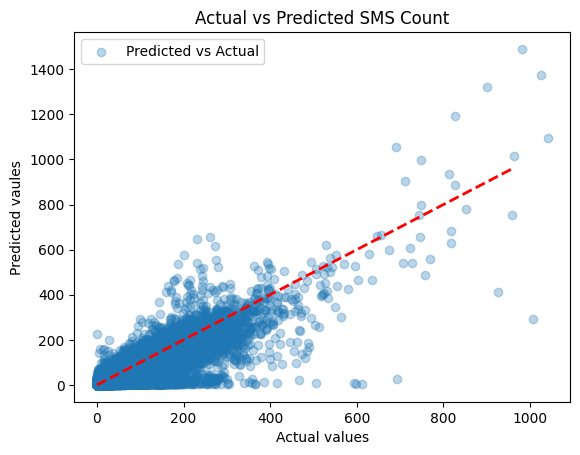

In [11]:
# Plotting predicted vs actual SMS count for training data
plt.scatter(Y_train, train_prediction, alpha=0.3, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted vaules")
plt.title("Actual vs Predicted SMS Count")
plt.legend()
plt.show()

Prediction on Test Data

In [12]:
test_prediction = model.predict(X_test )

In [13]:
score_1 = metrics.r2_score(Y_test, model.predict(X_test))

score_2 = metrics.mean_absolute_error(Y_test, model.predict(X_test))

print("R2 score: ", score_1)
print("Mean Absolute Error: ", score_2)

R2 score:  0.7792036049729095
Mean Absolute Error:  2.2830152200958693


Visual Representation of the Predicted vs Actual SMS Count for Test Data

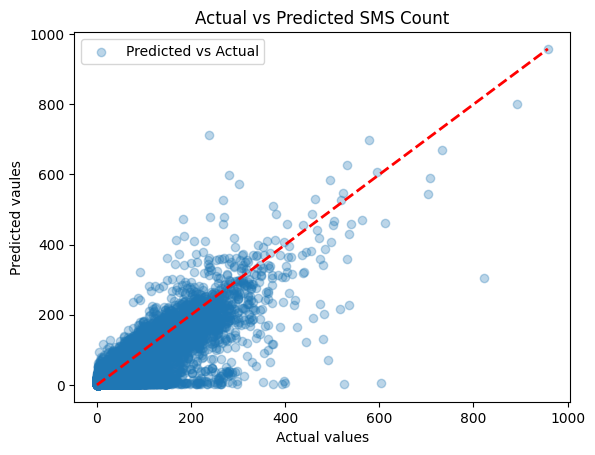

In [14]:
plt.scatter(Y_test, test_prediction, alpha=0.3, label='Predicted vs Actual')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)
plt.xlabel("Actual values")
plt.ylabel("Predicted vaules")
plt.title("Actual vs Predicted SMS Count")
plt.legend()
plt.show()

Model Accuracy Measurement

In [15]:
# Comprehensive Model Accuracy Measurement
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import math

# Calculate accuracy metrics for Training Data
train_r2 = metrics.r2_score(Y_train, train_prediction)
train_mae = metrics.mean_absolute_error(Y_train, train_prediction)
train_mse = mean_squared_error(Y_train, train_prediction)
train_rmse = math.sqrt(train_mse)
train_mape = mean_absolute_percentage_error(Y_train, train_prediction)

# Calculate accuracy metrics for Test Data
test_r2 = metrics.r2_score(Y_test, test_prediction)
test_mae = metrics.mean_absolute_error(Y_test, test_prediction)
test_mse = mean_squared_error(Y_test, test_prediction)
test_rmse = math.sqrt(test_mse)
test_mape = mean_absolute_percentage_error(Y_test, test_prediction)

# Display Model Accuracy Results
print("=" * 60)
print("MODEL ACCURACY MEASUREMENT")
print("=" * 60)
print("\n--- TRAINING DATA ACCURACY ---")
print(f"R² Score:                 {train_r2:.4f} (Max: 1.0)")
print(f"Mean Absolute Error:      {train_mae:.4f}")
print(f"Mean Squared Error:       {train_mse:.4f}")
print(f"Root Mean Squared Error:  {train_rmse:.4f}")
print(f"Mean Absolute % Error:    {train_mape:.4f}")

print("\n--- TEST DATA ACCURACY ---")
print(f"R² Score:                 {test_r2:.4f} (Max: 1.0)")
print(f"Mean Absolute Error:      {test_mae:.4f}")
print(f"Mean Squared Error:       {test_mse:.4f}")
print(f"Root Mean Squared Error:  {test_rmse:.4f}")
print(f"Mean Absolute % Error:    {test_mape:.4f}")

print("\n--- ACCURACY INTERPRETATION ---")
print(f"Model Accuracy (Train):   {train_r2 * 100:.2f}%")
print(f"Model Accuracy (Test):    {test_r2 * 100:.2f}%")
print("=" * 60)

MODEL ACCURACY MEASUREMENT

--- TRAINING DATA ACCURACY ---
R² Score:                 0.7864 (Max: 1.0)
Mean Absolute Error:      2.2955
Mean Squared Error:       64.5369
Root Mean Squared Error:  8.0335
Mean Absolute % Error:    186993505624.7081

--- TEST DATA ACCURACY ---
R² Score:                 0.7792 (Max: 1.0)
Mean Absolute Error:      2.2830
Mean Squared Error:       64.3864
Root Mean Squared Error:  8.0241
Mean Absolute % Error:    237897952754.7490

--- ACCURACY INTERPRETATION ---
Model Accuracy (Train):   78.64%
Model Accuracy (Test):    77.92%


Code by;

Simeon Boison